Make chart overlaying 3 graphs 

Step 1 clean data  

In [713]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def removeColumnsByNumber(df, columnNumber):
    return df.drop(df.columns[columnNumber], axis=1)

def renameColumns(df, oldName, newName):
    return df.rename(columns={oldName: newName})

def turnColumnToDate(df, columnName):
    return pd.to_datetime(df[columnName])


GallupData = pd.read_csv('GallupData.csv')
PewData = pd.read_csv('PewData.csv')
BitcoinWalletsOverTime = pd.read_csv('BitcoinWalletsOverTime.csv')

Clean the datas

In [714]:

GallupData = removeColumnsByNumber(GallupData, [1, 2, 3, 4, 5])

GallupData = renameColumns(GallupData, 'Unnamed: 0', 'Date')
GallupData = renameColumns(GallupData, 'Great deal/Fair amount', 'Media')

GallupData

,Date,Media
0,2021 sep 1-17,36.0
1,2020 Aug 31-Sep 13,40.0
2,2019 sep 3-15,41.0
3,2018 sep 4-12,45.0
4,2017 sep 6-10,41.0
5,2016 sep 7-11,32.0
6,2015 sep 9-13,40.0
7,2014 sep 4-7,40.0
8,2013 sep 5-8,44.0
9,2012 sep 6-9,40.0


In [715]:
PewData = removeColumnsByNumber(PewData, [1, 3])
PewData = renameColumns(PewData, 'Individual polls', 'Gonverment')

PewData

,Date,Gonverment
0,4/11/21,24
1,8/2/20,20
2,4/12/20,27
3,3/25/19,17
4,12/4/17,18
...,...,...
153,12/1/70,54
154,10/15/68,62
155,12/1/66,65
156,10/15/64,77


Convert dates to years

In [716]:
def dropNanRows(df):
    return df.dropna()

def turnColumnToDate(df, columnName):
    return pd.to_datetime(df[columnName])

GallupData = dropNanRows(GallupData)

GallupData['Date'] = GallupData['Date'].str[0:4]

GallupData['Date'] = turnColumnToDate(GallupData, 'Date')

GallupData

/var/folders/__/z5_dw4sx4jl9bj9g5mdtsctc0000gn/T/ipykernel_18065/4193993010.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GallupData['Date'] = GallupData['Date'].str[0:4]
/var/folders/__/z5_dw4sx4jl9bj9g5mdtsctc0000gn/T/ipykernel_18065/4193993010.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GallupData['Date'] = turnColumnToDate(GallupData, 'Date')


,Date,Media
0,2021-01-01,36.0
1,2020-01-01,40.0
2,2019-01-01,41.0
3,2018-01-01,45.0
4,2017-01-01,41.0
5,2016-01-01,32.0
6,2015-01-01,40.0
7,2014-01-01,40.0
8,2013-01-01,44.0
9,2012-01-01,40.0


In [717]:
from datetime import datetime

def removeDuplicateDates(df):
    return df.drop_duplicates(subset='Date')

PewData = dropNanRows(PewData)

PewData['Date'] = turnColumnToDate(PewData, 'Date')
PewData['Date'] = PewData['Date'].dt.strftime('%Y-%m-%d').str[0:4]

def deleteRowsByIndex(df, index):
    return df.drop(index)

PewData = deleteRowsByIndex(PewData, [153,154,155,156,157])

PewData['Date'] = turnColumnToDate(PewData, 'Date')

PewData = removeDuplicateDates(PewData)

PewData.tail(10)

,Date,Gonverment
131,1985-01-01,49
136,1984-01-01,46
138,1982-01-01,33
139,1980-01-01,39
142,1979-01-01,30
143,1978-01-01,29
144,1977-01-01,33
146,1976-01-01,33
151,1974-01-01,36
152,1972-01-01,53


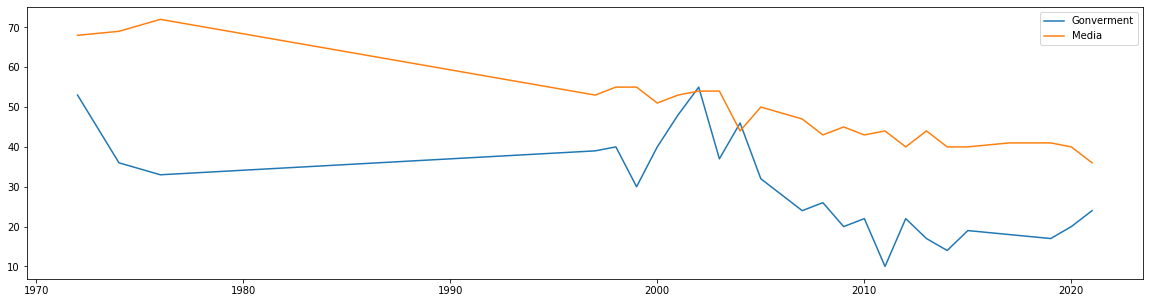

In [718]:
GovernmentAndMedia = pd.merge(PewData, GallupData, how='outer', on='Date')

GovernmentAndMedia = GovernmentAndMedia.dropna()

def twoLineGraph(df, x, y1, y2):
    plt.rcParams["figure.figsize"] = (20,5) 
    plt.plot(df[x], df[y1], label=y1)
    plt.plot(df[x], df[y2], label=y2)
    plt.legend()
    plt.show()

twoLineGraph(GovernmentAndMedia, 'Date', 'Gonverment', 'Media')

In [719]:
BitcoinWalletsOverTime

,Timestamp,my-wallet-n-users
0,2011-11-28 23:00:00,2
1,2011-12-21 23:00:00,291
2,2012-01-13 23:00:00,758
3,2012-02-05 23:00:00,1551
4,2012-02-28 23:00:00,2282
...,...,...
1525,2022-04-22 20:54:32,82460010
1526,2022-04-23 19:54:32,82473408
1527,2022-04-24 18:54:32,82484075
1528,2022-04-25 17:54:32,82495462


In [720]:
BitcoinWalletsOverTime = renameColumns(BitcoinWalletsOverTime, 'Timestamp', 'Date')
BitcoinWalletsOverTime = renameColumns(BitcoinWalletsOverTime, 'my-wallet-n-users', 'Bitcoin Wallets')

BitcoinWalletsOverTime['Date'] = turnColumnToDate(BitcoinWalletsOverTime, 'Date')

BitcoinWalletsOverTime


,Date,Bitcoin Wallets
0,2011-11-28 23:00:00,2
1,2011-12-21 23:00:00,291
2,2012-01-13 23:00:00,758
3,2012-02-05 23:00:00,1551
4,2012-02-28 23:00:00,2282
...,...,...
1525,2022-04-22 20:54:32,82460010
1526,2022-04-23 19:54:32,82473408
1527,2022-04-24 18:54:32,82484075
1528,2022-04-25 17:54:32,82495462


In [721]:
BitcoinWalletsOverTime['Date'] = BitcoinWalletsOverTime['Date'].dt.strftime('%Y-%m-%d').str[0:4]
BitcoinWalletsOverTime['Date'] = turnColumnToDate(BitcoinWalletsOverTime, 'Date')
BitcoinWalletsOverTime

,Date,Bitcoin Wallets
0,2011-01-01,2
1,2011-01-01,291
2,2012-01-01,758
3,2012-01-01,1551
4,2012-01-01,2282
...,...,...
1525,2022-01-01,82460010
1526,2022-01-01,82473408
1527,2022-01-01,82484075
1528,2022-01-01,82495462


In [722]:
# Remove duplicates
def removeDuplicateDates(df):
    return df.drop_duplicates(subset='Date')

BitcoinWalletsOverTime = removeDuplicateDates(BitcoinWalletsOverTime)
BitcoinWalletsOverTime

,Date,Bitcoin Wallets
0,2011-01-01,2
2,2012-01-01,758
18,2013-01-01,93134
34,2014-01-01,1081937
50,2015-01-01,2825099
65,2016-01-01,5454997
81,2017-01-01,11064485
117,2018-01-01,21789499
302,2019-01-01,31925191
667,2020-01-01,44729012


In [723]:
# Merge all three data sets

BitcoinVsInstitutionalTrust = pd.merge(BitcoinWalletsOverTime, GovernmentAndMedia, how='outer', on='Date')
BitcoinVsInstitutionalTrust

,Date,Bitcoin Wallets,Gonverment,Media
0,2011-01-01,2.0,10.0,44.0
1,2012-01-01,758.0,22.0,40.0
2,2013-01-01,93134.0,17.0,44.0
3,2014-01-01,1081937.0,14.0,40.0
4,2015-01-01,2825099.0,19.0,40.0
5,2016-01-01,5454997.0,NaN,NaN
6,2017-01-01,11064485.0,18.0,41.0
7,2018-01-01,21789499.0,NaN,NaN
8,2019-01-01,31925191.0,17.0,41.0
9,2020-01-01,44729012.0,20.0,40.0


In [724]:

#Scaling Data

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(copy=False)
BitcoinVsInstitutionalTrust['Government'] = scaler.fit_transform(BitcoinVsInstitutionalTrust['Gonverment'].values.reshape(-1, 1))
BitcoinVsInstitutionalTrust['Media'] = scaler.fit_transform(BitcoinVsInstitutionalTrust['Media'].values.reshape(-1, 1))
BitcoinVsInstitutionalTrust['Bitcoin Wallets']= scaler.fit_transform(BitcoinVsInstitutionalTrust['Bitcoin Wallets'].values.reshape(-1, 1))

BitcoinVsInstitutionalTrust

,Date,Bitcoin Wallets,Gonverment,Media,Government
0,2011-01-01,0.000000,0.000000,0.222222,0.000000
1,2012-01-01,0.000009,0.266667,0.111111,0.266667
2,2013-01-01,0.001160,0.155556,0.222222,0.155556
3,2014-01-01,0.013481,0.088889,0.111111,0.088889
4,2015-01-01,0.035201,0.200000,0.111111,0.200000
5,2016-01-01,0.067969,NaN,NaN,NaN
6,2017-01-01,0.137863,0.177778,0.138889,0.177778
7,2018-01-01,0.271496,NaN,NaN,NaN
8,2019-01-01,0.397786,0.155556,0.138889,0.155556
9,2020-01-01,0.557320,0.222222,0.111111,0.222222


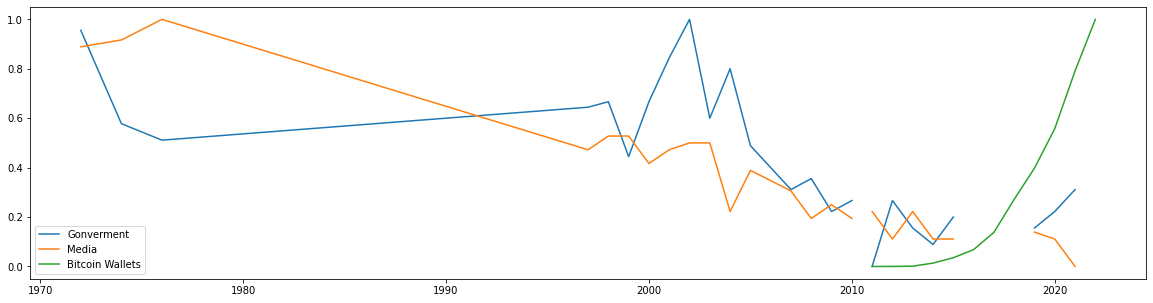

In [725]:
def threeLinePlot(df, x, y1, y2, y3):
    plt.rcParams["figure.figsize"] = (20,5) 
    plt.plot(df[x], df[y1], label=y1)
    plt.plot(df[x], df[y2], label=y2)
    plt.plot(df[x], df[y3], label=y3)
    plt.legend()
    plt.show()

threeLinePlot(BitcoinVsInstitutionalTrust, 'Date', 'Gonverment', 'Media', 'Bitcoin Wallets')